<a href="https://colab.research.google.com/github/Tiagosf00/ml-kaggle/blob/master/ml/class/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Random Forest


[Random Forest]("https://en.wikipedia.org/wiki/Random_forest") é um tipo de algoritimo de classificação ou regreção, ou seja seu objetivo é predizer a classe a que um dado pertençe. E como o nome pode intuir ele usa uma floresta, no caso de arvores de decisão, que já foram esplicadas anteriormente, para chegar ao resultado.

Essa floresta é uma tecnica de [conjunto]("https://en.wikipedia.org/wiki/Ensemble_learning"), ou seja ela usa multiplos modelos preditivos, as arvores de decisão, menores e a partir de suas prediçoes ela estabelece a sua predição final.

E com essa formação, podemos ter uma predição mais precisa pois assim os erros de uma arvore podem ser corrigidos pelo resto da floresta.

 

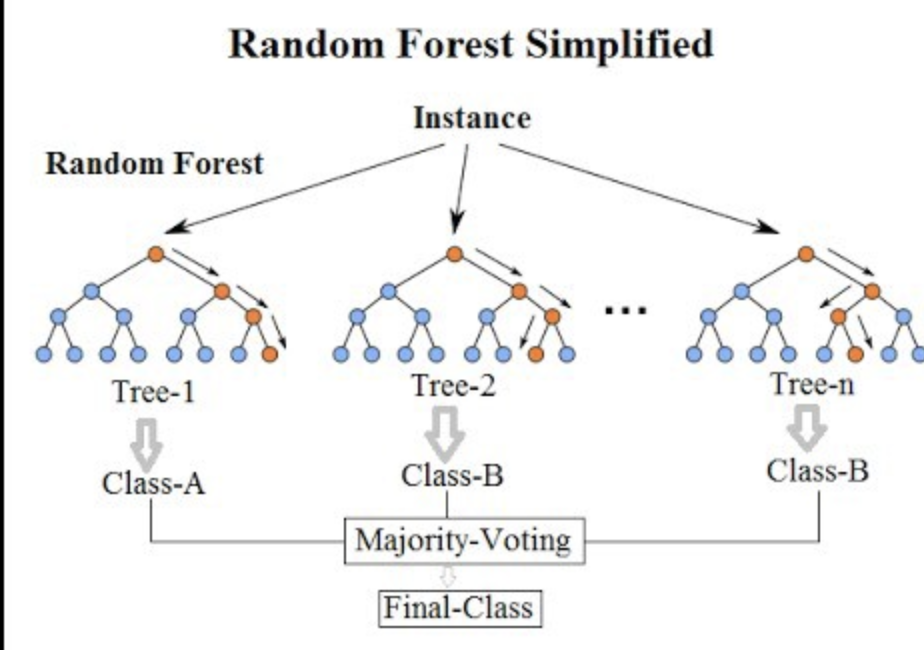

Para criarmos uma Random Forest temos que treinar cada arvore individualmente para enfim fazermos a floresta funcionar, que é o objetivo do algoritimo, ter varios votos com viezes diferentes para juntos termos o melhor resultado. 

Para treinarmos cada uma das arvores, precisamos realizar o [Bagging]("https://en.wikipedia.org/wiki/Bootstrap_aggregating"), ou Bootstrap, que um processo de seleção de casos de treinamento, não todos, que são usados para para treinar cada arvore individualmente.

O resultado dado pela floresta pode ser a predição mais predita entre as arvores ou a media das predições:

$\hat{f} = \frac{1}{B}\sum_{b=1}^{B} f_b (x')$

Podemos tambem estimar a incerteza da predição apartir da formula:

$\sigma = \sqrt{\frac{\sum_{b=1}^{B}(f_b(x')-f)^2}{B-1}}\$

Abaixo temos um exemplo de um pseudoalgoritimo de uma random forest, em que n é menor que o total de exemplos, X são os atributos, Y sãos rotulos e f sãos as arvores a serem criadas.

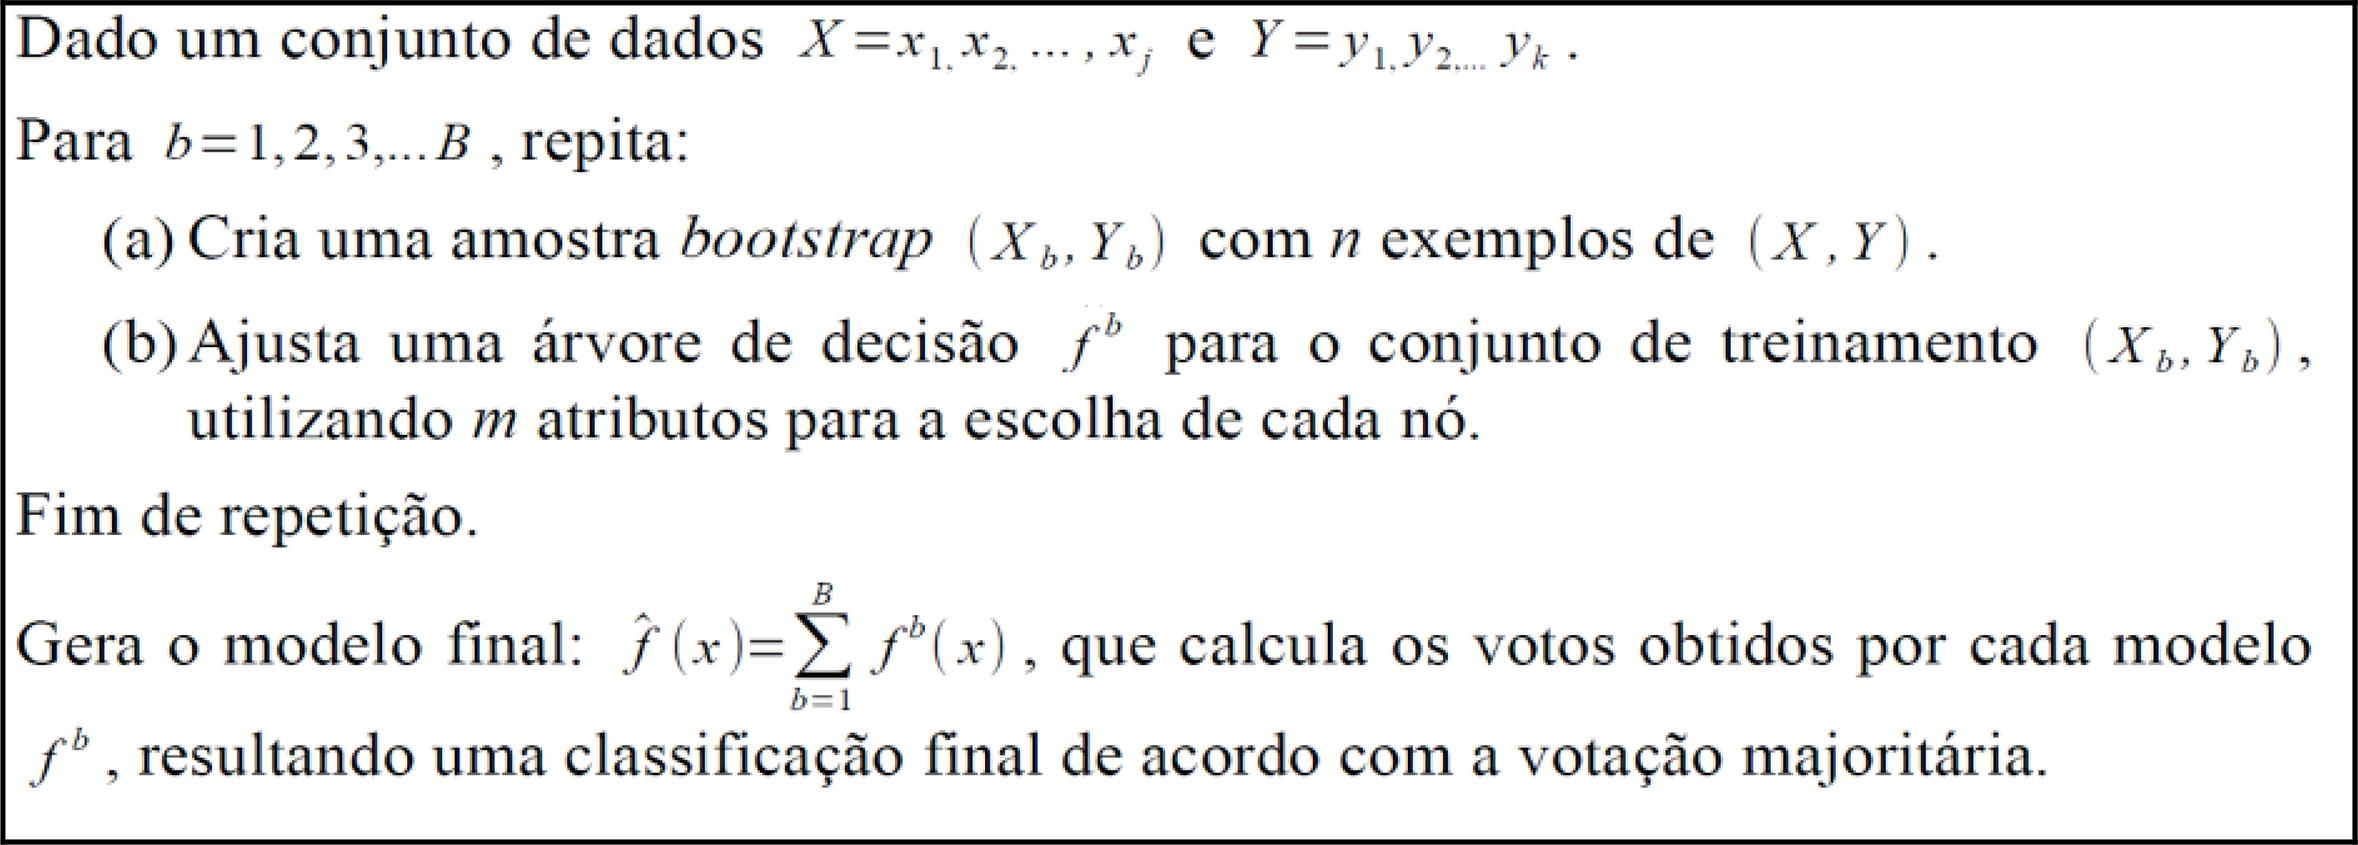


#RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, random_state=None, max_samples=None)
A seguir será mostrado como utilizar o código do skitlearn ela recebe diversos parâmetros para o algoritmo de predição vamos começar mostrando os principais parâmetros:

#n_estimators
Esse parâmetro indica a quantidade de arvores a ser efetuadas pelo programa caso não coloque esse parâmetro ele utiliza 100 arvores.

#criterion 
Esse parâmetro e uma string com o nome do critério utilizado para calcular a impureza e os valores possíveis são “gini” e “entropy” que representam um índice de desigualdade e a entropia.

#max_depth
Define a profundidade máxima da arvore, facilitando diminuir a complexidade e custo de utilizar a arvore, além de reduzir o superajustamento.

#max_leaf_nodes
Define a quantidade máxima de nós na arvore, ou seja, limita a quantidade de divisões que a arvore pode fazer, sendo uma maneira mais precisa de impedir superajustamento que a max_depht 

#min_impurity_decrease
Essa variável define o valor mínimo de impureza que a transformação de uma folha em nó deve reduzir para ocorrer a divisão

#bootstrap
Essa variável define se ocorre o bagging ou não se ela for false todas as arvores são treinadas com o conjunto de treino inteiro

#oob_score
Essa variável define se o programa deve, antes de fazer o bagging, separar o conjunto de teste para avaliar o modelo do conjunto utilizado para criar as arvores
#random_state
Permite a repetibilidade do processo pois quando em NONE ele vai gerar um valor aleatório que será utilizado de semente para a execução dos fatores aleatórios do programa, mas se um número for colocado e for utilizado o mesmo data set e possível repetir o resultado desde que se saiba o número.

#max_samples
Define o número máximo de exemplos a ser lido por cada estimador se o bootstrap for igual true, ou seja, o número máximo de exemplos em cada “bag”.


# Aplicação

O hospital Albert Einstein, em São Paulo, disponibilizou uma [base de dados](https://www.kaggle.com/einsteindata4u/covid19) de pacientes anônimos que fizeram o teste para o COVID-19, a base possui diversos dados clínicos (atributos) dos pacientes junto ao resultado dos testes feitos.

Para demonstrar o uso do algoritmo de classificação Random Forest em um problema real, a base do COVID-19 foi utilizada para treinar um classificador utilizando a implementação do algoritmo disponível na biblioteca sklearn. O classificador possui o intuito de prever a condição de pacientes com a doença utilizando sinais e sintomas.

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
# Importando o dataset do Covid-19
data = pd.read_excel('dataset.xlsx')

In [0]:
# Dados clínicos selecionados
X = data[['Patient age quantile',
          'Patient addmited to regular ward (1=yes, 0=no)',
          'Patient addmited to semi-intensive unit (1=yes, 0=no)',
          'Patient addmited to intensive care unit (1=yes, 0=no)']]

# Resultado do Exame
y = data['SARS-Cov-2 exam result']

In [0]:
# 70% para treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
classificador = RandomForestClassifier(n_estimators=100)

classificador.fit(X_train, y_train)

y_pred = classificador.predict(X_test)

In [0]:
acuracia = metrics.accuracy_score(y_test, y_pred)*100

print("Acurácia do classificador: {0:.2f}%".format(acuracia))

Acurácia do classificador: 90.02%
